In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
# Load Dataset

customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

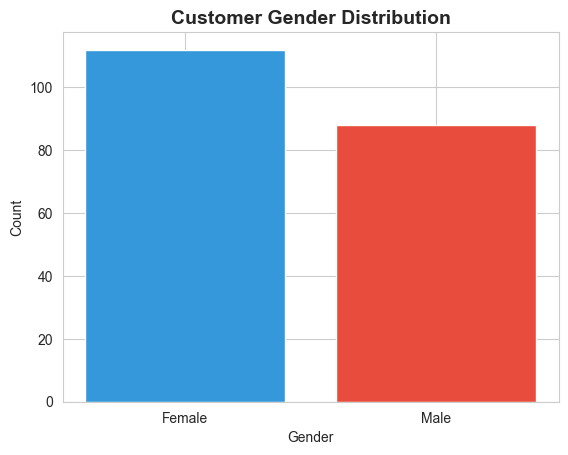

In [8]:
# Gender Distribution

plt.Figure(figsize=(8,5))
gender_counts = customer_data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['#3498db','#e74c3d'])
plt.title('Customer Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

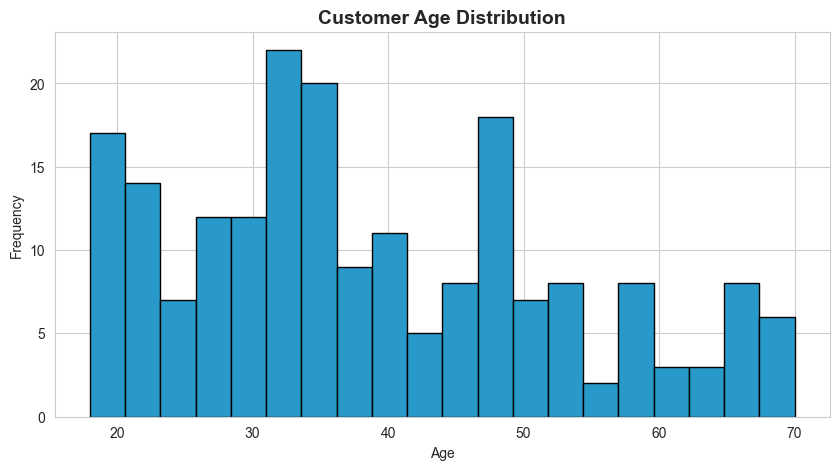

In [9]:
# Age Distribution

plt.figure(figsize=(10,5))
plt.hist(customer_data['Age'], bins=20, color='#2899c9', edgecolor='black')
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

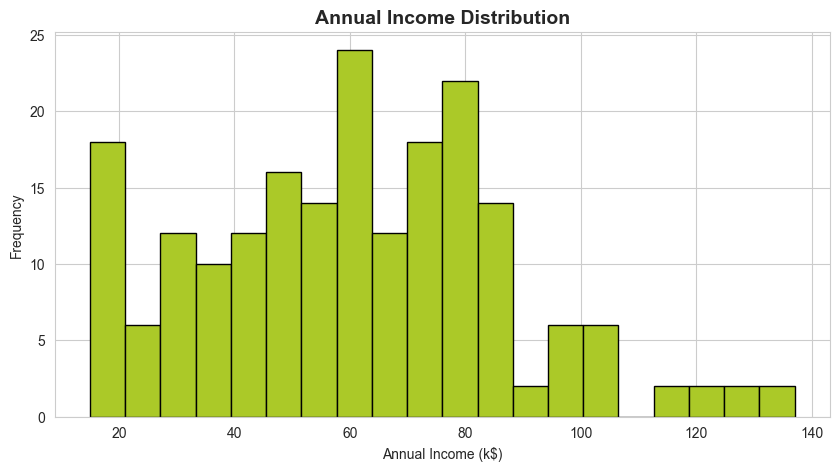

In [10]:
# Annual Income Distribution

plt.figure(figsize=(10,5))
plt.hist(customer_data['Annual Income (k$)'], bins=20, color="#abc928", edgecolor='black')
plt.title('Annual Income Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

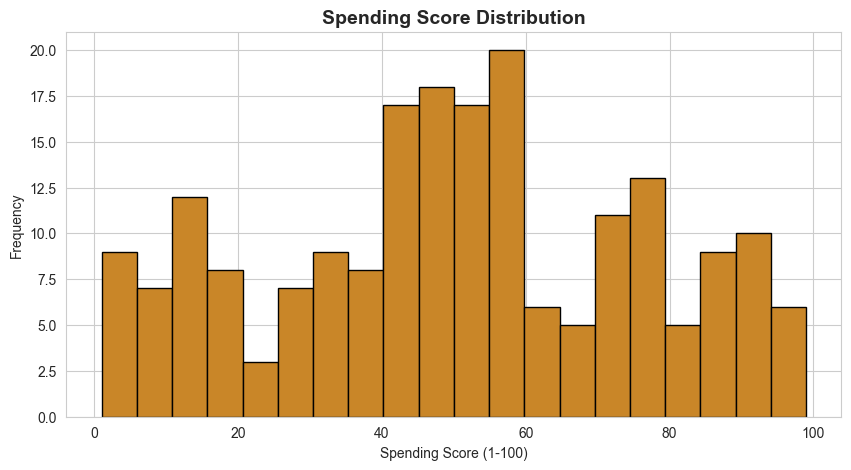

In [12]:
# Spending Score Distribution

plt.figure(figsize=(10,5))
plt.hist(customer_data['Spending Score (1-100)'], bins=20, color="#c98628", edgecolor='black')
plt.title('Spending Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

In [13]:
x = customer_data.iloc[:, [3,4]].values

In [15]:
# Calculate WCSS for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

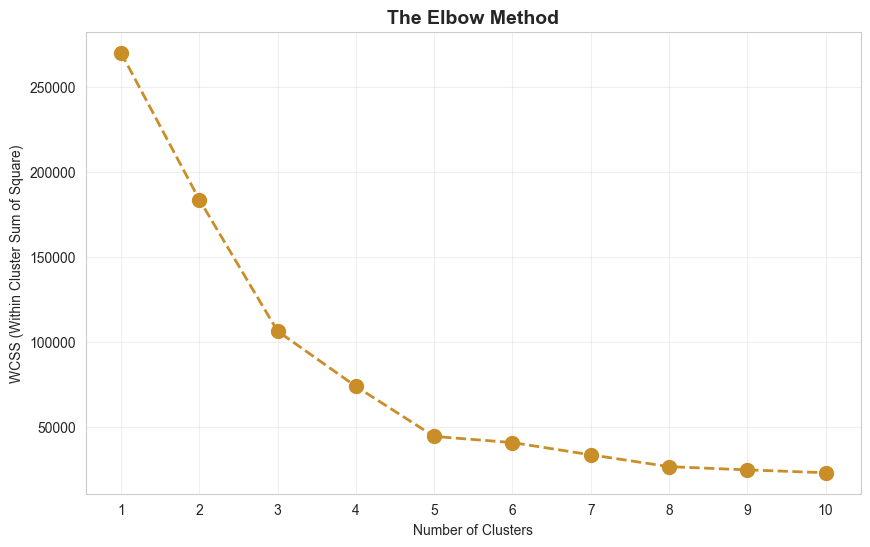

In [16]:
# Plot Elbow Graph

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='#c98e28', linewidth=2, markersize=10)
plt.title('The Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Square)')
plt.xticks(range(1,11))
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
# Train with optimal Clusters

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = kmeans.fit_predict(x)

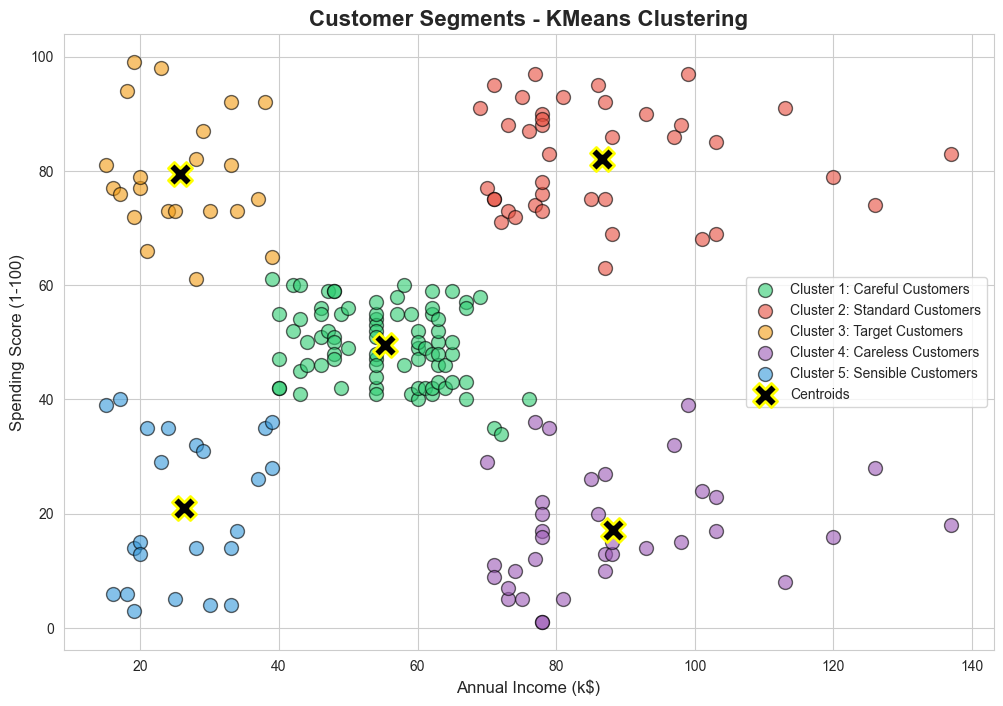

In [19]:
plt.figure(figsize=(12,8))

colors = ['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#3498db']
clusters_names = ['Careful Customers', 'Standard Customers', 'Target Customers', 'Careless Customers', 'Sensible Customers']

for i in range(5):
    plt.scatter(x[y == i, 0], x[y == i, 1], s=100, c=colors[i],
                label=f'Cluster {i+1}: {clusters_names[i]}', alpha=0.6, edgecolors='black')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids', edgecolors='yellow', linewidths=2)

plt.title('Customer Segments - KMeans Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.show()


In [20]:
customer_data['cluster'] = y

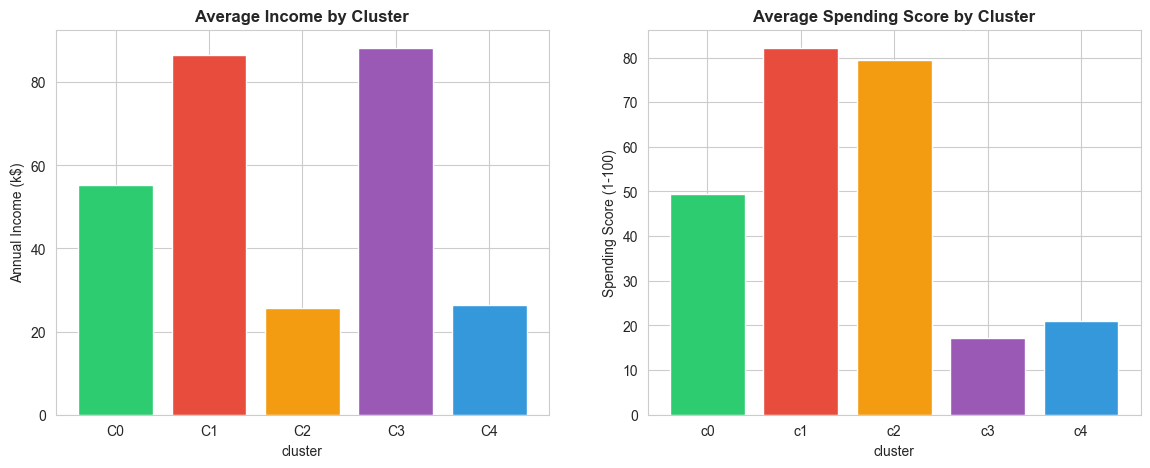

In [24]:
# Create Comparison Visualisation
fig, axes = plt.subplots(1,2, figsize=(14,5))

# Income comparison
cluster_income = [customer_data[customer_data['cluster']==i]['Annual Income (k$)'].mean() 
                  for i in range(5)]

axes[0].bar(range(5), cluster_income, color=colors)
axes[0].set_title('Average Income by Cluster', fontweight='bold')
axes[0].set_xlabel('cluster')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels([f'C{i}' for i in range(5)])


# Spending comparison
clusters_spending = [customer_data[customer_data['cluster']==i]['Spending Score (1-100)'].mean() 
                     for i in range(5)]

axes[1].bar(range(5), clusters_spending, color=colors)
axes[1].set_title('Average Spending Score by Cluster', fontweight='bold')
axes[1].set_xlabel('cluster')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels([f'c{i}' for i in range(5)])

plt.show()



In [26]:
new_customer = np.array([[70, 80]])   # Income = 70k, Spending = 80

predicted_cluster = kmeans.predict(new_customer)[0]

print(f"Customer (Income: ${new_customer[0][0]}k, Spending: {new_customer[0][1]}) "
      f"-- Cluster {predicted_cluster}: {clusters_names[predicted_cluster]}")


Customer (Income: $70k, Spending: 80) -- Cluster 1: Standard Customers


In [27]:
# Save the Model

joblib.dump(kmeans, 'customer_segmentation_model.pkl')
print("Model Saved")

Model Saved
